<a href="https://colab.research.google.com/github/trandangtrungduc/BasicMachineLearningTask/blob/main/Melbourne_Housing_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MELBOURNE HOUSING MARKET**
---
**1. ANALYZING AND CLEANING DATA**

> Connect Google Drive and Google Colab and import necessary librabries

> Load the data in file csv from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import librabries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data/Melbourne_housing_FULL.csv') # Load data
data.head(5) # See 5 information row at the top of dataset

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
data.shape # Size of data

(34857, 21)

In [ ]:
data.dtypes # Type of data

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [ ]:
data.describe() # Descriptive  statistic of numeric dataset

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


**Conclusion:**
*   The size of data is (34857, 21)
*   The missing data appear in many columns such as: Price, Bedroom2, ,...
*   Data exists mainly in 2 types: float64, object. (except Room is int64)


In [ ]:
data.isnull().sum() # Count missing value of each column

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

Evaluate each data and how to process each feature base on above tables

1. Price:
> * Missing values: 7610/34857.
> * Basic statistics index: Mean 1050173, Std 641467, Median 870000, Min = 85000, Max = 11200000.
> * Solution: Because the missing value is quiet large and may affect the linear model. The remaining data is 27247 which is also quiet good for training, so we **delete all NaN rows**.
2. Distance, Postcode, Propertycount:
> * Missing values: 1/34857, 3/34857 .
> * Basic statistics index: The number of missing values is extremely small .
> * Solution: These values have no special relationship with other columns and not important, so we **delete these 1 row or 3 rows**.

3. Bedroom2, Bathroom, Car, YearBuilt:
> * Missing values: 8217/34857, 8226/34857, 8728/34857, 19306/34857.
> * Basic statistics index: The number of missing values is quite large.
> * Solution: Because these are the features chosen according to human behavior, we **replace NaN with the most common value for each feature**.

4. Lattitude, Longtitude:
> * Missing values: 7976/34857, 7976/34857, 11810/34857, 21115/34857.
> * Basic statistics index: Lattitude (Mean -37.81, Std 0.09, Median -37.80, Min -38.19, Max -37.39), Longtitude (Mean 145.00, Std 0.12, Median 145, Min 144.42, Max 145.53).
> * Solution: Because the values 25% and 75% are not significantly different from the median, we **replace NaN with the Mean value = -37.81 and 145**.

5. Landsize, BuildingArea:
> * Missing values: 11810/34857, 21115/34857.
> * Basic statistics index: Lansize (Mean 593.59, Std 3398.84, Median 521, Min 0, Max 433014), BuildingArea (Mean 160.25, Std 401.27, Median 136, Min 0, Max 44515).
> * Solution: Because the missing data is quite a lot and std is very large, the method with little effect on the model is probably taking the mean, so we **replace NaN with the Mean value**.

6. Address, Type, Method, SellerG, Date, CouncilArea, Regionname:
> * This is object data that is not needed in the use of home price prediction. We will remove these features.

In [ ]:
# delete all NaN rows 
data = data[data.Price.notnull()]   
# drop NaN
data.drop(data[data.Distance.isnull()].index, inplace=True)
data.drop(data[data.Postcode.isnull()].index, inplace=True)
data.drop(data[data.Propertycount.isnull()].index, inplace=True)
# replace NaN with the most common value
data.Bedroom2.fillna(data.Bedroom2.mode()[0], inplace=True)
data.Bathroom.fillna(data.Bathroom.mode()[0], inplace=True)
data.Car.fillna(data.Car.mode()[0], inplace=True)
data.YearBuilt.fillna(data.YearBuilt.mode()[0], inplace=True)
# replace NaN with the Mean value = -37.81 and 145
data.Lattitude.fillna(data.Lattitude.mean(), inplace=True)
data.Longtitude.fillna(data.Longtitude.mean(), inplace=True)
# replace these values with Mean value
data.Landsize.fillna(data.Landsize.mean(), inplace=True)
data.BuildingArea.fillna(data.BuildingArea.mean(), inplace=True)
# remove some unecessary columns
del data['Address']
del data['SellerG']
del data['CouncilArea']
del data['Regionname']
del data['Date']

In [ ]:
data.head(5) # Review data

,Suburb,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,Abbotsford,2,h,1480000.0,S,2.5,3067.0,2.0,1.0,1.0,202.0,156.834586,1970.0,-37.7996,144.9984,4019.0
2,Abbotsford,2,h,1035000.0,S,2.5,3067.0,2.0,1.0,0.0,156.0,79.000000,1900.0,-37.8079,144.9934,4019.0
4,Abbotsford,3,h,1465000.0,SP,2.5,3067.0,3.0,2.0,0.0,134.0,150.000000,1900.0,-37.8093,144.9944,4019.0
5,Abbotsford,3,h,850000.0,PI,2.5,3067.0,3.0,2.0,1.0,94.0,156.834586,1970.0,-37.7969,144.9969,4019.0
6,Abbotsford,4,h,1600000.0,VB,2.5,3067.0,3.0,1.0,2.0,120.0,142.000000,2014.0,-37.8072,144.9941,4019.0


---
**2. EXAMINE AND EXPLORE DATA**
> **2.1 The correlation between Price and some Features**



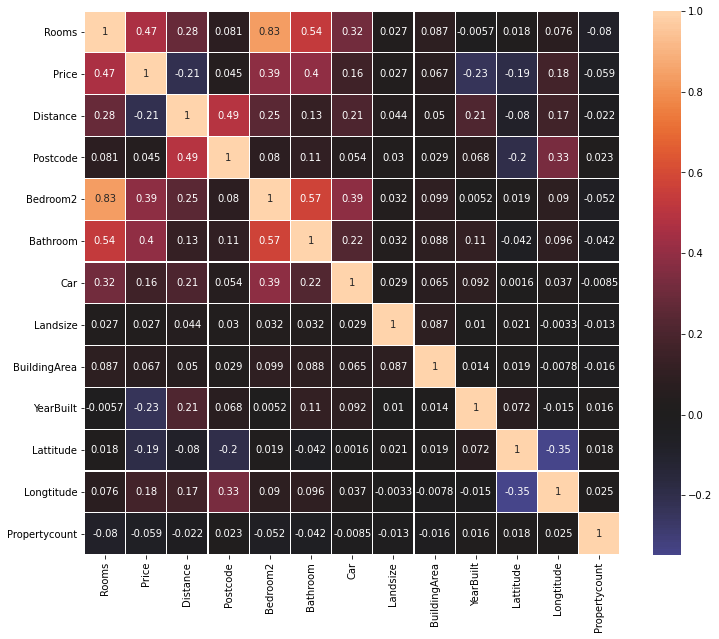

In [ ]:
plt.figure(figsize=(12,10)) # Correlation diagram of features  
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, center=0,  annot= True, linewidths=0.2)

> **Conclusion**: Based on the diagram above, we can see that the correlation of **room** and **bedroom2** is **highest** (0.83).

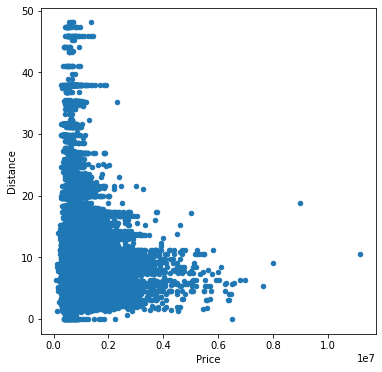

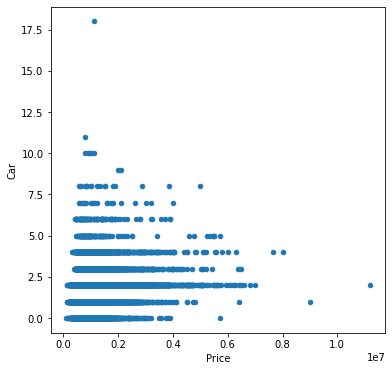

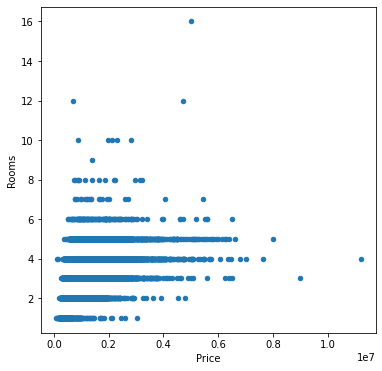

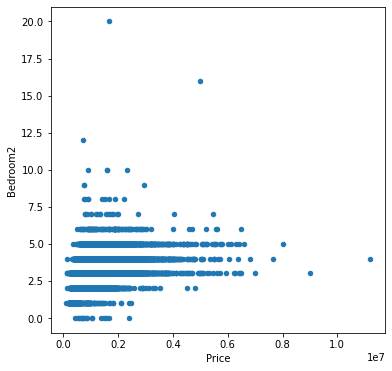

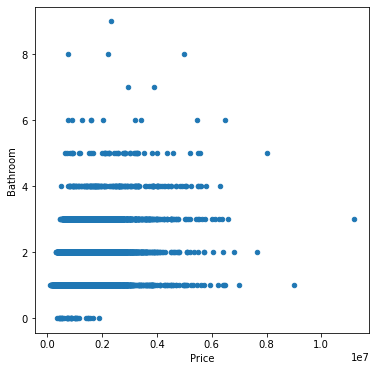

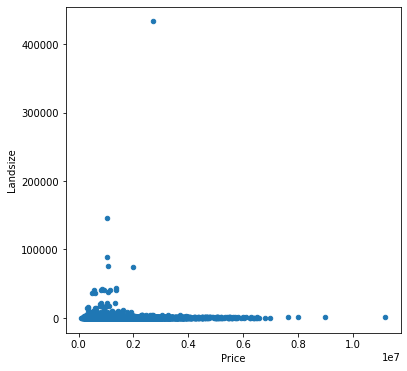

In [ ]:
data.plot(y='Distance',x='Price',kind='scatter',figsize=(6,6)) # Visualize correlation of Price and Distance
data.plot(y='Car',x='Price',kind='scatter',figsize=(6,6)) # Visualize correlation of Price and Car
data.plot(y='Rooms',x='Price',kind='scatter',figsize=(6,6)) # Visualize correlation of Price and Rooms
data.plot(y='Bedroom2',x='Price',kind='scatter',figsize=(6,6)) # Visualize correlation of Price and Bedroom2
data.plot(y='Bathroom',x='Price',kind='scatter',figsize=(6,6)) # Visualize correlation of Price and Bathroom
data.plot(y='Landsize',x='Price',kind='scatter',figsize=(6,6)) # Visualize correlation of Price and Landsize


> **Conclusion**: 
> > 1. The correlation between Price and Distance is very weak.
> > 2. The correlation between Price and Car is relatively weak.
> > 3. The correlation between Price and Rooms is pretty good but unstable.
> > 4. The correlation between Price and Bedroom2 is pretty good but unstable.
> > 5. The correlation between Price and Bathroom is weak.
> > 6. The correlation between Price and Landsize is very weak.

> **2.2 The correlation of Price and Suburb**

In [ ]:
# Realizing that "Suburb" is also quiet important reason which influences house Price, we consider it
data.Suburb.value_counts().unique # Calculate the number of house of each Suburb

<bound method Series.unique of Reservoir         727
Bentleigh East    493
Richmond          439
Preston           415
Brunswick         387
                 ... 
Kalkallo            1
Botanic Ridge       1
Lysterfield         1
Tecoma              1
viewbank            1
Name: Suburb, Length: 344, dtype: int64>

In [ ]:
# Average of Price according to Suburb
data['Price'].groupby(data.Suburb).agg(['count', 'mean']).sort_values(by='mean', ascending=False)

,count,mean
Suburb,,
Canterbury,85,2.386271e+06
Middle Park,54,2.232148e+06
Malvern,118,2.087619e+06
Deepdene,7,2.001786e+06
Brighton,317,1.984227e+06
...,...,...
Melton,30,4.345833e+05
Melton South,56,4.236920e+05
Bacchus Marsh,4,4.230000e+05


> **Conclusion**: Price of housing in Canterbury is highest.

---
**3. LINEAR REGRESSION MODEL**
> **3.1 Preprocess, Remove Outlier and Normalization**
> > Remove outlier of Price and define target set

In [ ]:
# Function to remove outlier
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25) # Q1
    q3 = df_in[col_name].quantile(0.75) # Q3
    iqr = q3-q1 # Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

New_data = remove_outlier(data, 'Price') # remove oulier
target = New_data.Price # target of train set   

> > Handle object data and normalize data

In [ ]:
# Although the suburb feature is quite important, it belongs to the object data and has more than 344 suburbs 
# so we use the feature method and type instead of the suburb.
Type_Method_dummies = pd.get_dummies(New_data[["Type", "Method"]])
# remove categorical columns and Price 
New_data = New_data.drop(["Suburb","Type","Method","Price"], axis=1)

# function to normalize data
def normalize_data(df):
    for column in df.columns:
      df[column] = np.log1p(df[column])
    return df

New_data = normalize_data(New_data)
source = New_data.join(Type_Method_dummies) 

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
source.head(10)
# Because all Lattitude data are NaN, so we remove this feature

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB
1,1.098612,1.252763,8.028781,1.098612,0.693147,0.693147,5.313206,5.061548,7.586296,NaN,4.983596,8.299037,1,0,0,0,1,0,0,0
2,1.098612,1.252763,8.028781,1.098612,0.693147,0.000000,5.056246,4.382027,7.550135,NaN,4.983561,8.299037,1,0,0,0,1,0,0,0
4,1.386294,1.252763,8.028781,1.386294,1.098612,0.000000,4.905275,5.017280,7.550135,NaN,4.983568,8.299037,1,0,0,0,0,0,1,0
5,1.386294,1.252763,8.028781,1.386294,1.098612,0.693147,4.553877,5.061548,7.586296,NaN,4.983585,8.299037,1,0,0,1,0,0,0,0
6,1.609438,1.252763,8.028781,1.386294,0.693147,1.098612,4.795791,4.962845,7.608374,NaN,4.983566,8.299037,1,0,0,0,0,0,0,1
10,1.098612,1.252763,8.028781,1.098612,0.693147,0.000000,5.204007,5.061548,7.586296,NaN,4.983574,8.299037,1,0,0,0,1,0,0,0
11,1.386294,1.252763,8.028781,1.609438,1.098612,0.000000,5.505332,5.351858,7.555382,NaN,4.983602,8.299037,1,0,0,0,1,0,0,0
14,1.098612,1.252763,8.028781,1.098612,0.693147,1.098612,5.549076,4.682131,7.544861,NaN,4.983575,8.299037,1,0,0,0,1,0,0,0
15,1.386294,1.252763,8.028781,1.386294,0.693147,1.098612,6.387702,5.061548,7.586296,NaN,4.983584,8.299037,1,0,0,0,1,0,0,0
16,1.098612,1.252763,8.028781,1.386294,0.693147,1.098612,6.387702,5.061548,7.586296,NaN,4.983584,8.299037,0,1,0,0,1,0,0,0


In [ ]:
del source['Lattitude'] # delete Lattitude feature

> **3.2 Holdout**

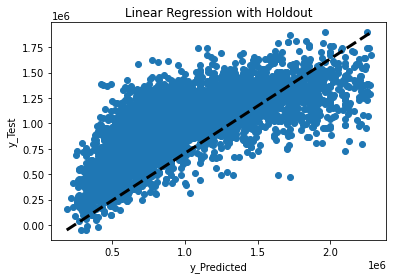

In [ ]:
X, y = source, target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # Divide the data into 2 train set and test set
# Initializatione
LR = LinearRegression()
LR.fit(X_train, y_train) # train model
y_pred = LR.predict(X_test) # y_predicted
plt.scatter(y_test,y_pred) # plot to compare y_predicted and y_test
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=3)
plt.xlabel('y_Predicted') # assign label for x axis
plt.ylabel('y_Test') # assign label for y axis
plt.title('Linear Regression with Holdout') # assign title for diagram
plt.show()

> **3.3 K-Folds Cross Validation**
> > Use the k-folds method with k = 5

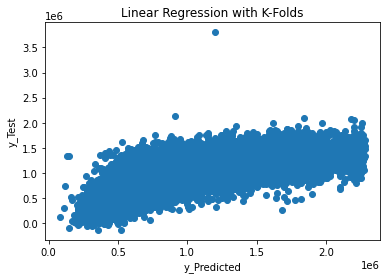

Mean 5-Folds R Squared: 0.5036381053779341


In [ ]:
y_pred_kFolds = cross_val_predict(LR, X.values, y.values, cv = 5)
plt.scatter(y, y_pred_kFolds)
plt.xlabel('y_Predicted') # assign label for x axis
plt.ylabel('y_Test') # assign label for y axis
plt.title('Linear Regression with K-Folds') # assign title for diagram
plt.show()
cv_r2_scores = cross_val_score(LR, source, target, scoring='r2')
print("Mean 5-Folds R Squared: {}".format(np.mean(cv_r2_scores)))

> > **Conclusion**: Linear regression model has R  > 0.5, so the Linear regression model can be considered appropriate to predict price of house.

---
**4. PCA**
> **4.1 Holdout**

In [ ]:
pca = PCA(n_components=19)
pca_fit = pca.fit_transform(source)
pca_df = pd.DataFrame(data = pca_fit, columns = ['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9',
                                                   'pca10','pca11','pca12','pca13','pca14','pca15','pca16','pca17'
                                                   ,'pca18','pca19'])

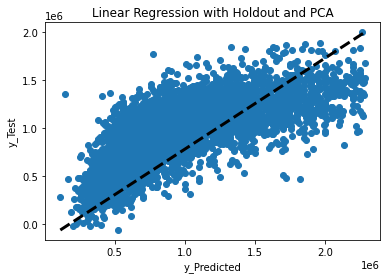

In [ ]:
X_pca_train, X_pca_test, y_train_pca, y_test_pca = train_test_split(pca_df, y, test_size=0.2)
LR_pca = LinearRegression()
LR_pca.fit(X_pca_train, y_train_pca)
y_pred_pca = LR_pca.predict(X_pca_test)
plt.scatter(y_test_pca,y_pred_pca) # plot to compare y_predicted and y_test
plt.plot([y_test_pca.min(), y_test_pca.max()], [y_pred_pca.min(), y_pred_pca.max()], 'k--', lw=3)
plt.xlabel('y_Predicted') # assign label for x axis
plt.ylabel('y_Test') # assign label for y axis
plt.title('Linear Regression with Holdout and PCA') # assign title for diagram
plt.show()

> **4.2 K-Folds Cross Validation**
> > Use the k-folds method with k = 5

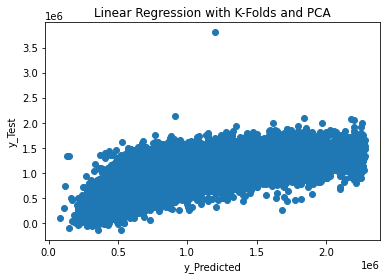

Mean 5-Folds R Squared: 0.5036381053779341


In [ ]:
y_pred_kFolds_pca = cross_val_predict(LR_pca, pca_df.values, y.values, cv = 5)
plt.scatter(y, y_pred_kFolds_pca)
plt.xlabel('y_Predicted') # assign label for x axis
plt.ylabel('y_Test') # assign label for y axis
plt.title('Linear Regression with K-Folds and PCA') # assign title for diagram
plt.show()
cv_r2_scores_pca = cross_val_score(LR, source, target, scoring='r2')
print("Mean 5-Folds R Squared: {}".format(np.mean(cv_r2_scores_pca)))

> **Conclusion**: PCA didn't make the model result better.

---
**5. VISUALIZE THE RESIDUE AND HOMOSCEDASTICITY**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


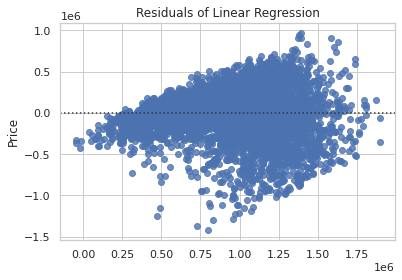

In [ ]:
Residual = y_pred-y_test # remainder of y
sns.set_theme(style="whitegrid") # set white grid
sns.residplot(y_pred, Residual)  # plot residual
plt.title('Residuals of Linear Regression')
plt.show()

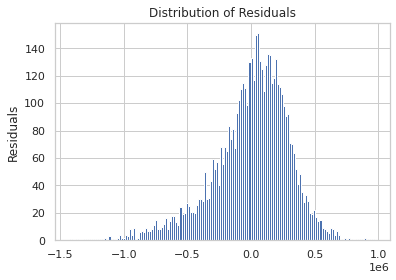

In [ ]:
plt.hist(Residual, bins=150) # plot distribution of Residual
plt.title('Distribution of Residuals') # assign title for diagram
plt.ylabel('Residuals') # assign label for y axis
plt.show()

> **Conclusion**: Based on two diagram above, we find:
> > 1. Mean of Residual approximately equal to 0
> > 2. Most data points are distributed around the horizontal axis, but there are a few outlier point.
> > 3. Linear Regression model is acceptable for prediction of Price

---
**6. TUNE THE MODEL**


In [ ]:
X, y = source, target # Rewrite data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # holdout

In [ ]:
learning_rate = [0.01, 0.05, 0.1]  # learning rate test list
subsample = [0.9, 0.5, 0.2, 0.1] # subsample test list
n_estimators = [100, 500, 1000, 1500] # estimator test list
max_depth = [4, 6, 8, 10] # max depth test list

param_grid = {'learning_rate':learning_rate,
              'subsample':subsample,
              'n_estimators':n_estimators,
              'max_depth':max_depth} # set Parameter
GBR = GradientBoostingRegressor() # Initial GradientBoostingRegreesor
GBR = GridSearchCV(estimator=GBR, param_grid=param_grid, cv=2,n_jobs=-1) # optimal value algorithm 
GBR.fit(X_train, y_train) # train
print("Results from Grid Search")
print("\n The best estimator across ALL searched params:\n", GBR.best_estimator_) # best estimator
print("\n The best score across ALL searched params:\n", GBR.best_score_) # best score
print("\n The best parameters across ALL searched params:\n", GBR.best_params_) # best hyper parameter

Results from Grid Search

 The best estimator across ALL searched params:
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=8,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.5, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.8129268302047427

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 1500, 'subsample': 0.5}


In [ ]:
GBR_best = GradientBoostingRegressor(**GBR.best_params_) # train with best parameter
GBR_best.fit(X_train, y_train) # train
y_pred = GBR_best.predict(X_test) # predict test set
print('\n\nR-squared test set: ')
print(GBR_best.score(X_test, y_test)) # best score of test set
print('\nMAE test set: ')
print(mean_absolute_error(y_test, y_pred)) # MAE of test set
print('\nMSE test set: ')
print(mean_squared_error(y_test, y_pred)) # MSE of test set



R-squared test set: 
0.825521558248397

MAE test set: 
123566.43116667907

MSE test set: 
31010816372.87627


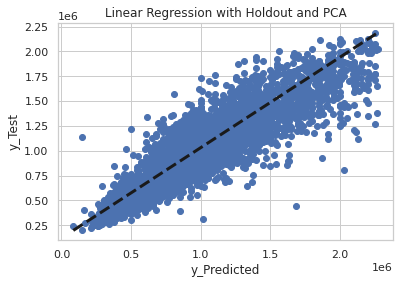

In [ ]:
plt.scatter(y_test,y_pred) # plot to compare y_predicted and y_test
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=3)
plt.xlabel('y_Predicted') # assign label for x axis
plt.ylabel('y_Test') # assign label for y axis
plt.title('Linear Regression with Holdout and PCA') # assign title for diagram
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


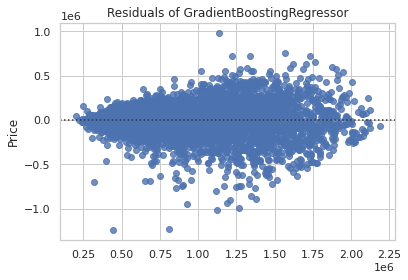

In [ ]:
Residual = y_pred-y_test # remainder of y
sns.set_theme(style="whitegrid") # set white grid
sns.residplot(y_pred, Residual)  # plot residual
plt.title('Residuals of GradientBoostingRegressor')
plt.show()

> **Conclusion**: Based on two diagram above, we find:
> > 1. Mean of Residual approximately equal to 0
> > 2. The results are significantly better than not using the optimization functions.

<function matplotlib.pyplot.show>

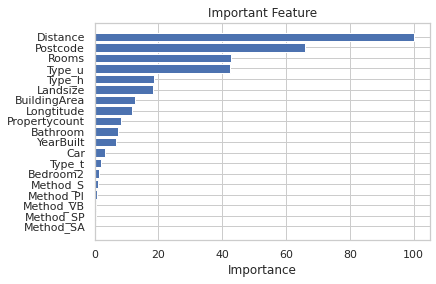

In [ ]:
important_feature = GBR_best.feature_importances_ # find important feature
important_feature = 100.0*(important_feature/important_feature.max()) 
sorted = np.argsort(important_feature) # sort the feature according to important_feature
pos = np.arange(sorted.shape[0])
plt.barh(pos, important_feature[sorted], align='center') # plot bar diagram
plt.yticks(pos, X.columns.values[sorted]) # set label for each bar
plt.xlabel('Importance') # assign label for x axis
plt.title('Important Feature') # assign label for diagram
plt.show()

> **Conclusion**: Distance is the most important feature in training the model.

---
**7. CONCLUSION**
> 1. In this problem, using PCA does not make the model better
> 2. Using the optimization functions available by sklearn can automatically find the optimal hyper parameters, but it will take more time to train.
> 3. The value of the house depends on many factors, the most important of which is Distance.

